In [1]:
from turtle import color
from sklearn.cluster import DBSCAN
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
import seaborn as sns
import numpy as np

In [2]:
#Read the t-SNE feature data and standardise 
df = pd.read_csv('2YTSNEfeatures.csv', index_col=[0])
transform = preprocessing.StandardScaler()
dft = transform.fit(df).transform(df)
dftd = pd.DataFrame(dft)

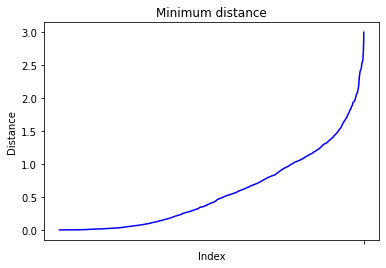

In [3]:
#Calculate the nearest distances between datapoints
dftd.columns=('X', 'Y')
dftd.sort_values(by=['X', 'Y'])
dfE = pd.DataFrame(columns=['index', 'distance'])

for i in range(0, len(dftd)-1):
    dist = np.linalg.norm(dftd.iloc[i]-dftd.iloc[i+1])
    dfE = dfE.append({'index': str(i), 'distance': dist}, ignore_index=True)

dfE = dfE.sort_values(by=['distance'])
dfE = pd.DataFrame(dfE)

sns.lineplot(x ='index', y = 'distance', data=dfE, color='blue')
plt.xticks(ticks='')
plt.title('Minimum distance')
plt.ylabel('Distance')
plt.xlabel('Index')
plt.show()

In [4]:
#silhouette for eps, number of cluesters and outliers
silhouette_avg = []
clusters = []
noise = []
for a in np.arange(0.1, 0.9, 0.01):
    db = DBSCAN(eps=a).fit(dft)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    silhouette_avg.append(silhouette_score(dft, db.labels_))
    clusters.append(len(set(labels)) - (1 if -1 in labels else 0))
    noise.append(list(labels).count(-1))


eps = np.arange(0.1, 0.9, 0.01).tolist()
sa = silhouette_avg
clust = clusters
nois = noise
data = {'eps':eps, 'silhouette average':sa, 'n_clusters': clust, 'n_noise':nois}
dfs = pd.DataFrame(data)

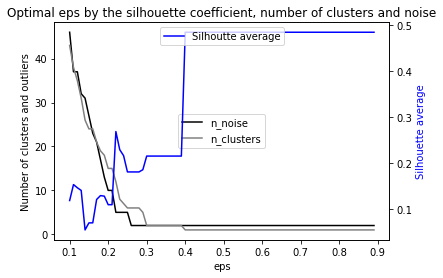

In [5]:
#plot silhuette eps
fig, ax = plt.subplots()
sns.lineplot(data=dfs, x='eps', y='n_noise', ax=ax, color='black')
sns.lineplot(data=dfs, x='eps', y='n_clusters', ax=ax, color='grey')
ax2 = ax.twinx()
sns.lineplot(data=dfs, x='eps', y='silhouette average', ax=ax2, color='blue')
ax.set_ylabel('Number of clusters and outliers')
ax2.set_ylabel('Silhouette average', color='blue')
ax.legend(['n_noise', 'n_clusters'], loc='center')
ax2.legend(['Silhoutte average'], loc='upper center')
plt.title('Optimal eps by the silhouette coefficient, number of clusters and noise')
plt.show()

In [6]:
#min_samples optimatisation
silhouette_avg_m = []
clusters_m = []
noise_m = []
range = np.arange(2, 50, 1).tolist()
for b in range:
    db_m = DBSCAN(eps=0.22, min_samples=b).fit(dft)
    core_samples_mask = np.zeros_like(db_m.labels_, dtype=bool)
    core_samples_mask[db_m.core_sample_indices_] = True
    labels = db_m.labels_
    silhouette_avg_m.append(silhouette_score(dft, db_m.labels_))
    clusters_m.append(len(set(labels)) - (1 if -1 in labels else 0))
    noise_m.append(list(labels).count(-1))


min_samp = range
sa_m = silhouette_avg_m
clust_m = clusters_m
nois_m = noise_m
data_m = {'min_sample':min_samp, 'silhouette average':sa_m, 'n_clusters': clust_m, 'n_noise':nois_m}
dfs_m = pd.DataFrame(data_m)
print(dfs_m)

    min_sample  silhouette average  n_clusters  n_noise
0            2            0.255741          13        2
1            3            0.255741          13        2
2            4            0.267927          12        5
3            5            0.267927          12        5
4            6            0.313467          11       10
5            7            0.382592          10       18
6            8            0.382592          10       18
7            9            0.383026          10       22
8           10            0.383026          10       22
9           11            0.383026          10       22
10          12            0.383026          10       22
11          13            0.383116          10       24
12          14            0.383354          10       32
13          15            0.383354          10       32
14          16            0.383354          10       32
15          17            0.383354          10       32
16          18            0.383290          10  

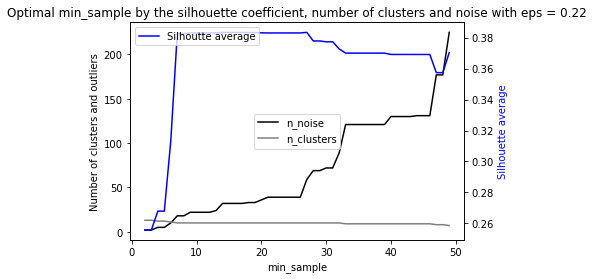

In [7]:
#plot silhuette min_samples
fig, ax = plt.subplots()
sns.lineplot(data=dfs_m, x='min_sample', y='n_noise', ax=ax, color='black')
sns.lineplot(data=dfs_m, x='min_sample', y='n_clusters', ax=ax, color='grey')
ax2 = ax.twinx()
sns.lineplot(data=dfs_m, x='min_sample', y='silhouette average', ax=ax2, color='blue')
ax.set_ylabel('Number of clusters and outliers')
ax2.set_ylabel('Silhouette average', color='blue')
ax.legend(['n_noise', 'n_clusters'], loc='center')
ax2.legend(['Silhoutte average'], loc='upper left')
plt.title('Optimal min_sample by the silhouette coefficient, number of clusters and noise with eps = 0.22')
plt.show()

In [8]:
#Optimise algorithm
silhouette_avg_a = []
clusters_a = []
noise_a = []
range = ['auto', 'ball_tree', 'kd_tree', 'brute']
for c in range:
    db_a = DBSCAN(eps=0.22, min_samples=27, algorithm=c).fit(dft)
    core_samples_mask = np.zeros_like(db_a.labels_, dtype=bool)
    core_samples_mask[db_a.core_sample_indices_] = True
    labels = db_a.labels_
    silhouette_avg_a.append(silhouette_score(dft, db_a.labels_))
    clusters_a.append(len(set(labels)) - (1 if -1 in labels else 0))
    noise_a.append(list(labels).count(-1))

In [9]:
#Make a dataframe from algorithm optimations
algorithm = range
sa_a = silhouette_avg_a
clust_a = clusters_a
nois_a = noise_a
data_a = {'algorithm':algorithm, 'silhouette average':sa_a, 'n_clusters': clust_a, 'n_noise':nois_a}
dfs_a = pd.DataFrame(data_a)
print(dfs_a)


   algorithm  silhouette average  n_clusters  n_noise
0       auto            0.383434          10       59
1  ball_tree            0.383434          10       59
2    kd_tree            0.383434          10       59
3      brute            0.383434          10       59


In [10]:
#Make optimised DBSCAN analysis and plot the results
# Compute DBSCAN
db = DBSCAN(eps=0.22, min_samples=15).fit(dft)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


list = labels.tolist()
score = silhouette_score(df, labels)
dfdb = pd.DataFrame(dft)
dfdb.columns=('X', 'Y')
dfdb['label'] = list
df_noutliers = dfdb[dfdb.label >= 0]
df_outliers = dfdb[dfdb.label < 0]

dfdb.to_csv('DBSCANlabels.csv')
print("outliers:", df_outliers)
print("noutliers:", df_noutliers)
print(dfdb)

outliers:              X         Y  label
193  -0.208117 -0.228677     -1
232  -0.249172  0.927290     -1
1026 -0.488016  1.254886     -1
1027 -0.487875  1.254761     -1
1028 -0.488015  1.254881     -1
1029 -0.487996  1.254897     -1
1030 -0.487985  1.254892     -1
1031 -0.488347  1.254873     -1
1107 -3.136311  1.769962     -1
1349  0.073605 -0.230997     -1
1350  0.073561 -0.231033     -1
1357 -0.100313 -0.432667     -1
1360 -0.113682 -0.450881     -1
1361 -0.114038 -0.452263     -1
1362 -0.112780 -0.449889     -1
1377  0.350394  0.407836     -1
1378  1.569153 -0.334412     -1
1379  0.350269  0.407791     -1
1382  1.568266 -0.335670     -1
1383  1.568457 -0.335364     -1
1384  0.350182  0.407620     -1
1385  1.567199 -0.336813     -1
1386  1.567168 -0.336780     -1
1387 -0.090420 -0.422474     -1
1425  1.755286  2.874608     -1
1826 -0.253782  0.925711     -1
1995 -0.201639 -0.229253     -1
2012 -0.202565 -0.229795     -1
2053 -0.203101 -0.229039     -1
2066 -0.202705 -0.229383     -

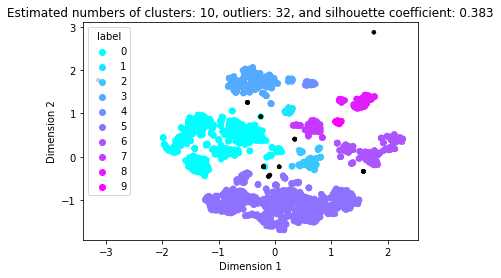

In [11]:
#plot the results, outlier in black
sns.scatterplot(x ='X', y = 'Y', data=df_noutliers, hue="label", palette="cool", ec="face", legend="full")
sns.scatterplot(x ='X', y = 'Y', data=df_outliers, legend=None, color='black',  ec="face", size=5)
plt.ylabel('Dimension 2')
plt.xlabel('Dimension 1')
plt.title("Estimated numbers of clusters: %d" % n_clusters_ + ", outliers: %d" % n_noise_ + ", and silhouette coefficient: %0.3f" % silhouette_score(dft, labels))
plt.show()